# Image Recognition with Convolutional Neural Networks

This exercise challenges you to build an image recognition model using a convolutional neural network. You'll select an image dataset, then train a model for image classification, object detection, or image segmentation using convolutional neural networks.

**Tasks:**

1. **Dataset Selection:** Choose a dataset. Consider dataset size, complexity, and availability. Only public datasets are acceptable. Briefly describe your dataset.
2. **Data Preparation:** Prepare the data: resize images, augment data, and split into training, validation, and test sets.
3. **Model Selection:** Choose a neural network architecture. Justify your choice based on the dataset and task.
4. **Training:** Train your model on the training data, monitoring performance on the validation set.
5. **Evaluation:** Evaluate the model's performance on the test set using appropriate metrics (e.g., accuracy, precision, recall, F1-score, mAP, IoU).
6. **Results and Discussion:** Present results, analyze performance, and discuss limitations or areas for improvement.

**Dataset Examples:**

* **Classification:** CIFAR-10/100, MNIST
* **Object Detection:** Pascal VOC/COCO
* **Segmentation:** Cityscapes

**Deliverables:**

* Jupyter Notebook with code for data preparation, model training, and evaluation. The outputs of the different code cells should be visible. At the end of the notebook add a brief report summarizing your approach, results, and discussion.

## 1. Dataset description, download and exploration

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Class distribution in training set:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


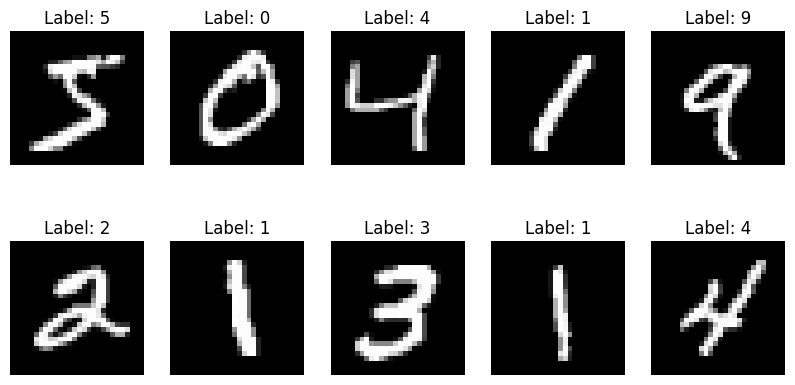

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dataset description
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Training labels shape:", y_train.shape)  # (60000,)
print("Test data shape:", x_test.shape)  # (10000, 28, 28)
print("Test labels shape:", y_test.shape)  # (10000,)

# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("\nClass distribution in training set:")
print(dict(zip(unique, counts)))

# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## 2. Data preparation and augmentation

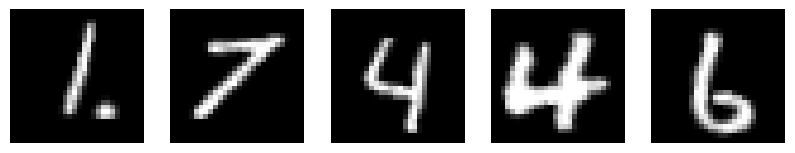

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channel dimension (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training set into training and validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

# Display augmented images
augmented_images = [datagen.flow(x_train, y_train, batch_size=1)[0][0] for i in range(5)]
plt.figure(figsize=(10, 3))
for i, img in enumerate(augmented_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

## 3. Model selection

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/mauro/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,370 (1.26 MB)

 Trainable params: 330,666 (1.26 MB)

 Non-trainable params: 704 (2.75 KB)

## 4. Training

Epoch 1/10


/Users/mauro/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


842/843 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7616 - loss: 0.7835

843/843 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.7619 - loss: 0.7826 - val_accuracy: 0.9827 - val_loss: 0.0556
Epoch 2/10
  1/843 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9531 - loss: 0.1867

/Users/mauro/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9531 - loss: 0.1867 - val_accuracy: 0.9828 - val_loss: 0.0549
Epoch 3/10
842/843 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9570 - loss: 0.1355

843/843 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9570 - loss: 0.1354 - val_accuracy: 0.9872 - val_loss: 0.0393
Epoch 4/10
  1/843 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9688 - loss: 0.1474

843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1474 - val_accuracy: 0.9873 - val_loss: 0.0385
Epoch 5/10
843/843 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9692 - loss: 0.0971

843/843 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9692 - loss: 0.0971 - val_accuracy: 0.9920 - val_loss: 0.0280
Epoch 6/10
  1/843 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9844 - loss: 0.0862

843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9844 - loss: 0.0862 - val_accuracy: 0.9922 - val_loss: 0.0280
Epoch 7/10
843/843 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9741 - loss: 0.0819 - val_accuracy: 0.9895 - val_loss: 0.0353
Epoch 8/10
843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1089 - val_accuracy: 0.9893 - val_loss: 0.0354
Epoch 9/10
843/843 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9794 - loss: 0.0697 - val_accuracy: 0.9915 - val_loss: 0.0304
Epoch 10/10
843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1302 - val_accuracy: 0.9915 - val_loss: 0.0306


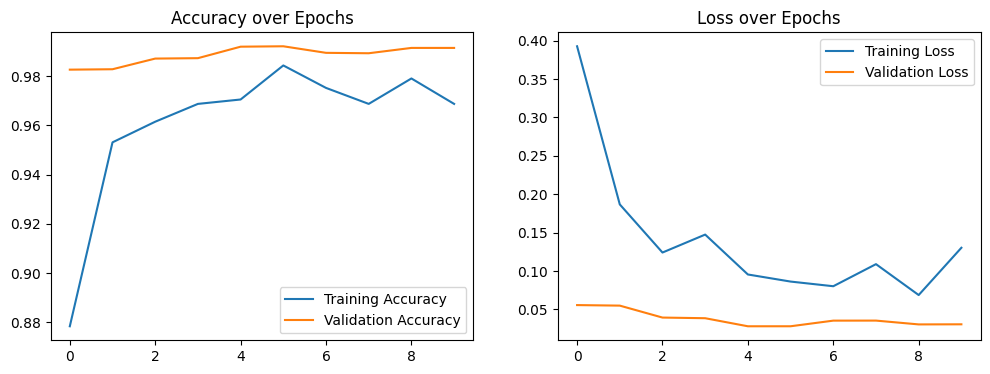

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train with data augmentation
batch_size = 64
epochs = 10

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stop]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

## 5. Evaluation on the test set

Test Accuracy: 0.9932
Test Loss: 0.0202
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



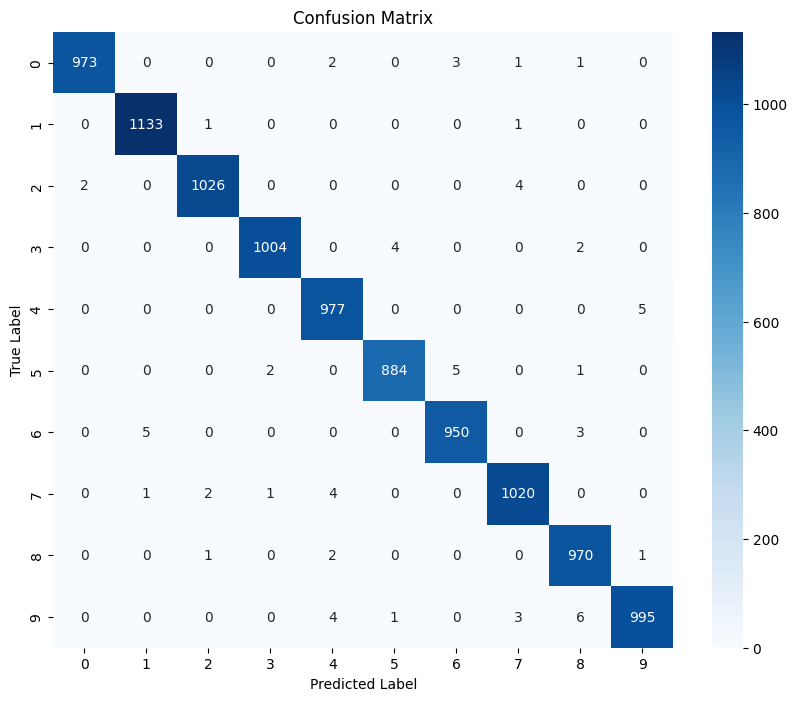

In [5]:
# Load best model
model.load_weights('best_model.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 6. Results and discussion

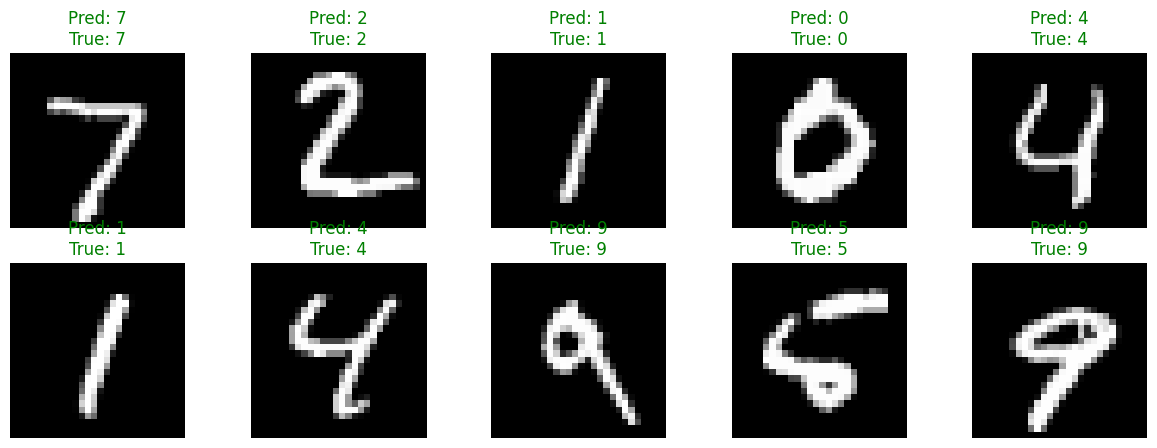


Results Summary:
- Final Test Accuracy: 0.9932
- The model achieved good performance on the MNIST dataset.
- Data augmentation helped prevent overfitting as seen in the training curves.
- The confusion matrix shows most classes were well-classified, with some confusion between similar digits (e.g., 4 and 9).

Areas for Improvement:
- Could experiment with deeper architectures or different regularization techniques.
- Could try more sophisticated augmentation techniques.
- Could implement learning rate scheduling for potentially better convergence.


In [6]:
# Display some test predictions
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    pred_label = np.argmax(y_pred[i])
    true_label = y_true[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.show()

print("\nResults Summary:")
print(f"- Final Test Accuracy: {test_acc:.4f}")
print("- The model achieved good performance on the MNIST dataset.")
print("- Data augmentation helped prevent overfitting as seen in the training curves.")
print("- The confusion matrix shows most classes were well-classified, with some confusion between similar digits (e.g., 4 and 9).")
print("\nAreas for Improvement:")
print("- Could experiment with deeper architectures or different regularization techniques.")
print("- Could try more sophisticated augmentation techniques.")
print("- Could implement learning rate scheduling for potentially better convergence.")